In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [39]:
# Load the dataset
data_path = 'C:\\Users\\dvesh\\OneDrive\\Desktop\\ShadowFox\\ShadowFox\\Task2\\loan_prediction.csv'
data = pd.read_csv(data_path)

In [41]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data[['LoanAmount']])
data['Loan_Amount_Term'] = imputer.fit_transform(data[['Loan_Amount_Term']])
data['Credit_History'] = imputer.fit_transform(data[['Credit_History']])


In [42]:

# Fill missing categorical values with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)


In [43]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])


In [44]:

# Feature Engineering
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['LoanAmount_by_TotalIncome'] = data['LoanAmount'] / data['Total_Income']


In [45]:
# Drop 'Dependents' column
data.drop(columns=['Dependents'], inplace=True)


In [46]:
# Prepare the feature set and the target variable
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']


In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [49]:

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)


In [50]:
# Train the model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [51]:

# Make predictions
y_pred = best_model.predict(X_test)


In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [53]:
# Print evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8048780487804879
Confusion Matrix:
[[23 20]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.66        43
           1       0.79      0.95      0.86        80

    accuracy                           0.80       123
   macro avg       0.82      0.74      0.76       123
weighted avg       0.81      0.80      0.79       123



In [54]:

# Plot feature importance
feature_importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]


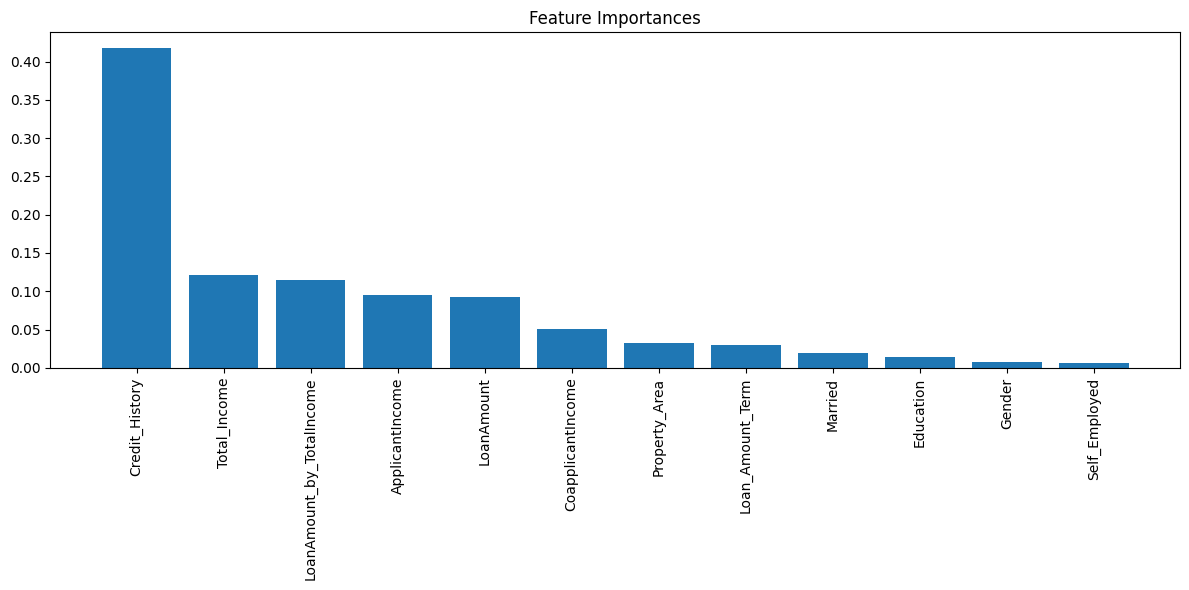

In [55]:
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()



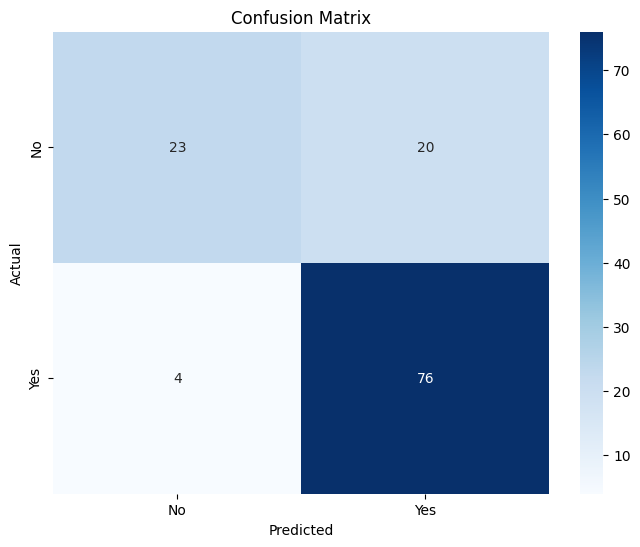

In [56]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()